In [2]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib
from matplotlib.pyplot import figure
from matplotlib import patches

#Loading the anatomical MRI data of Subject 1 in this case
mri_file = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen/sub-xp101/anat/sub-xp101_T1w.nii.gz'
img = nib.load(mri_file)
print(type(img))
print(img.shape)

<class 'nibabel.nifti1.Nifti1Image'>
(176, 512, 512)


In [12]:
img_data = img.get_fdata()
print(type(img_data)) 
print(img_data.shape)

<class 'numpy.ndarray'>
(176, 512, 512)


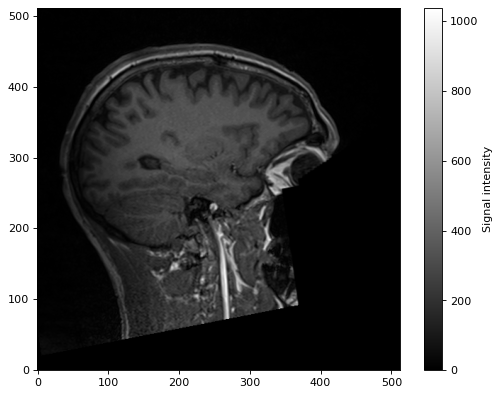

In [26]:
figure(figsize=(8, 6), dpi=80)
mid_slice_x = img_data[60, :, :]
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.colorbar(label='Signal intensity')
plt.show()

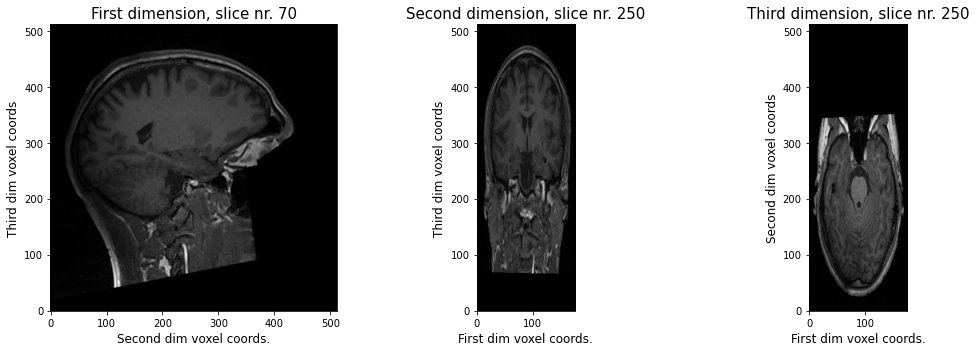

In [51]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(img_data[69, :, :].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)

ax[1].imshow(img_data[:, 249, :].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 250', fontsize=15)

ax[2].imshow(img_data[:, :, 249].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 250', fontsize=15)

fig.tight_layout()

#en caso de que quisieramos visualizarlo en condiciones se podría hacer un reshape o algo similar entiendo. 

In [6]:
#Time for loading an FMRI uwu
fmri_file = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen/sub-xp101/func/sub-xp101_task-fmriNF_bold.nii.gz'
f_img = nib.load(fmri_file)
print(f_img.shape)
print(f_img.header.get_zooms())

# useful method which returns the units of the measurements
print(f_img.header.get_xyzt_units()) 

(106, 106, 32, 210)
(1.981132, 1.981132, 4.0, 2.0)
('mm', 'sec')


(106, 106, 32, 210)
Shape of slice: (106, 106)


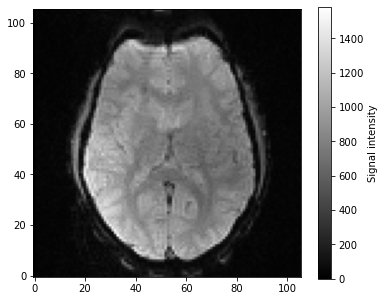

In [7]:
f_img_data = f_img.get_fdata()
print(f_img_data.shape)

mid_slice_x_fmri = f_img_data[:, :, 15, 45]  
print("Shape of slice: %s" % (mid_slice_x_fmri.shape,))

figure(figsize=(6, 5))
plt.imshow(mid_slice_x_fmri.T, cmap='gray', origin='lower')
plt.colorbar(label='Signal intensity')
plt.show()

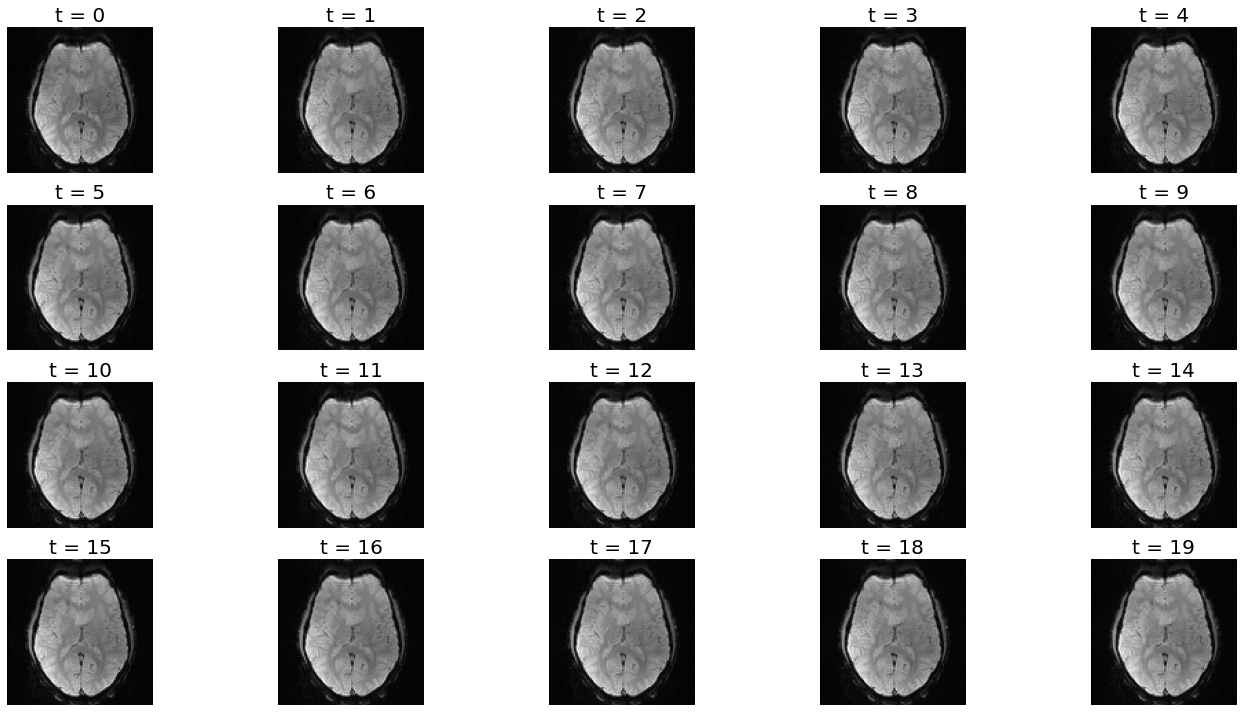

In [8]:
fig, axes = plt.subplots(ncols=5, nrows=4, figsize=(20, 10))  # 20 timepoints
for t, ax in enumerate(axes.flatten()):    
    ax.imshow(f_img_data[:, :, 15, t*4].T, cmap='gray', origin='lower') 
    ax.axis('off')
    ax.set_title('t = %i' % t, fontsize=20)
fig.tight_layout()

Voxel timeseries shape: (210,)


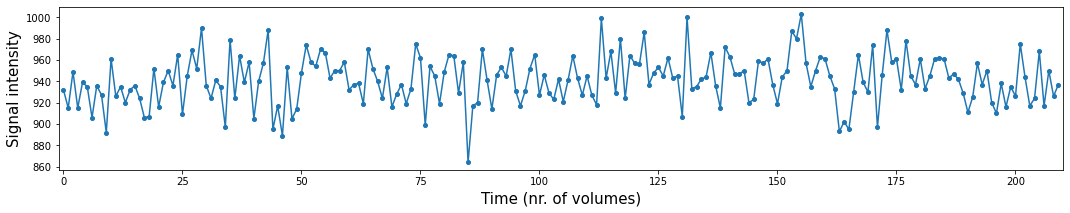

In [9]:
mid_vox_ts = f_img_data[39, 39, 21, :]  
print("Voxel timeseries shape: %s" % (mid_vox_ts.shape,))
plt.figure(figsize=(18, 3))
plt.plot(mid_vox_ts, 'o-', ms=4)
plt.xlim(-1, mid_vox_ts.size)
plt.ylabel('Signal intensity', fontsize=15)
plt.xlabel('Time (nr. of volumes)', fontsize=15)
plt.show()

(106, 106, 32, 163)
(1.981132, 1.981132, 4.0, 2.0)


Text(0.5, 1.0, 'fMRI task motorloc')

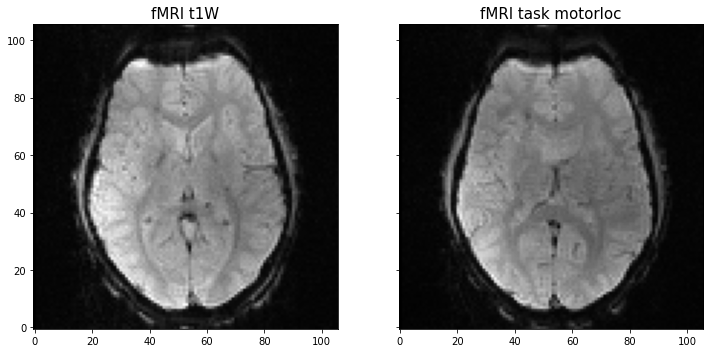

In [65]:
fmri_file2 = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen/sub-xp101/func/sub-xp101_task-motorloc_bold.nii.gz'
f_img2 = nib.load(fmri_file2)
print(f_img2.shape)
print(f_img2.header.get_zooms())

f_img_data2 = f_img2.get_fdata()
mid_slice_x_fmri2 = f_img_data2[:, :, 15, 45] 



f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12, 8))
ax1.imshow(mid_slice_x_fmri.T, cmap='gray', origin='lower')
ax1.set_title('fMRI t1W', fontsize=15)
ax2.imshow(mid_slice_x_fmri2.T, cmap='gray', origin='lower')
ax2.set_title('fMRI task motorloc', fontsize=15)
